### 📦 1. Setup & Imports

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.datasets import make_regression, fetch_california_housing
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
import seaborn as sns


### 📈 2. LINE FITTING (Synthetic Regression Line)

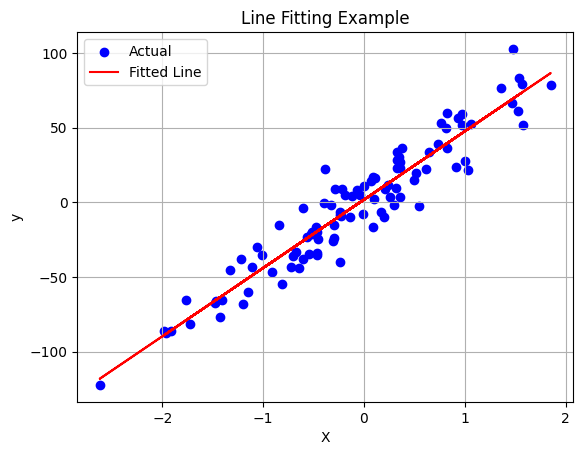

Slope (m): 45.785204830943506
Intercept (c): 1.7476729807904583


In [16]:
# Generate synthetic linear data
X, y = make_regression(n_samples=100, n_features=1, noise=15, random_state=42)

# Fit linear regression
model = LinearRegression()
model.fit(X, y)

# Predict
y_pred = model.predict(X)

# Plot
plt.scatter(X, y, color='blue', label='Actual')
plt.plot(X, y_pred, color='red', label='Fitted Line')
plt.title('Line Fitting Example')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()

# Print coefficients
print("Slope (m):", model.coef_[0])
print("Intercept (c):", model.intercept_)


### 🏠 3. REGRESSION ON REAL DATA (California Housing)

In [23]:
data = fetch_california_housing()
df = pd.DataFrame(data.data, columns=data.feature_names)
print(data.keys())
print(data.target)
df.head()

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])
[4.526 3.585 3.521 ... 0.923 0.847 0.894]


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


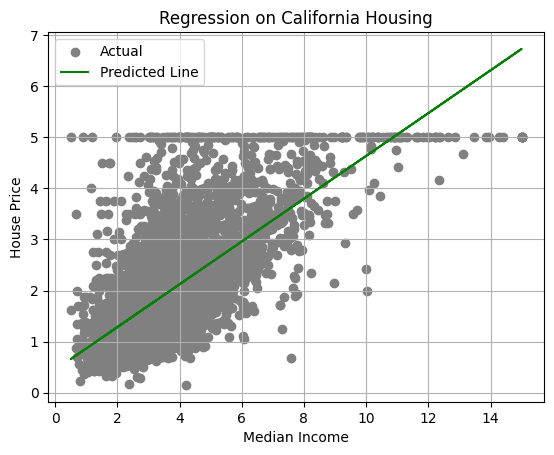

Mean Squared Error: 0.7091157771765548
R² Score: 0.45885918903846656
Slope: 0.4193384939381274
Intercept: 0.44459729169078677


In [4]:
# Load dataset
data = fetch_california_housing()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['Target'] = data.target

# Select a subset (for simplicity)
X = df[['MedInc']]  # Median income
y = df['Target']    # House value

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit model
reg_model = LinearRegression()
reg_model.fit(X_train, y_train)

# Predict
y_pred = reg_model.predict(X_test)

# Plot
plt.scatter(X_test, y_test, color='gray', label='Actual')
plt.plot(X_test, y_pred, color='green', label='Predicted Line')
plt.xlabel('Median Income')
plt.ylabel('House Price')
plt.title('Regression on California Housing')
plt.legend()
plt.grid(True)
plt.show()

# Evaluation
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))
print("Slope:", reg_model.coef_[0])
print("Intercept:", reg_model.intercept_)


### 🌸 4. K-NEAREST NEIGHBORS (KNN on Iris Dataset)

In [5]:
# Load dataset
from sklearn.datasets import load_iris
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['species'] = iris.target

# Features and target
X = df.iloc[:, :4]
y = df['species']

# Scale features (important for KNN)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.25, random_state=42)

# Train KNN
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Predict
y_pred = knn.predict(X_test)

# Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 1.0

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      1.00      1.00        11
           2       1.00      1.00      1.00        12

    accuracy                           1.00        38
   macro avg       1.00      1.00      1.00        38
weighted avg       1.00      1.00      1.00        38


Confusion Matrix:
 [[15  0  0]
 [ 0 11  0]
 [ 0  0 12]]
